<a href="https://colab.research.google.com/github/reenakh/DeletLater/blob/main/Collaborative%20Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import math
import json
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors

import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import warnings; warnings.simplefilter('ignore')





In [21]:
eletronics_data=pd.read_csv("/content/ratings_Electronics (1).csv",names=['userId', 'productId','Rating','timestamp'])


In [22]:
#display top 5 data
topdata=eletronics_data.head(5);
print(topdata)

           userId   productId  Rating     timestamp
0   AKM1MP6P0OYPR  0132793040     5.0  1.365811e+09
1  A2CX7LUOHB2NDG  0321732944     5.0  1.341101e+09
2  A2NWSAGRHCP8N5  0439886341     1.0  1.367194e+09
3  A2WNBOD3WNDNKT  0439886341     3.0  1.374451e+09
4  A1GI0U4ZRJA8WN  0439886341     1.0  1.334707e+09


In [23]:
#display shape (rows & column)
eletronics_data.shape

(927109, 4)

In [24]:
#Taking subset of the dataset
electronics_data=eletronics_data.iloc[:1048576,0:]

In [25]:
#Check the datatypes
eletronics_data.dtypes

userId        object
productId     object
Rating       float64
timestamp    float64
dtype: object

In [26]:
eletronics_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927109 entries, 0 to 927108
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     927109 non-null  object 
 1   productId  927109 non-null  object 
 2   Rating     927109 non-null  float64
 3   timestamp  927108 non-null  float64
dtypes: float64(2), object(2)
memory usage: 28.3+ MB


In [27]:
#Five point summary 

eletronics_data.describe()['Rating'].T

count    927109.000000
mean          3.977244
std           1.398075
min           1.000000
25%           3.000000
50%           5.000000
75%           5.000000
max           5.000000
Name: Rating, dtype: float64

In [28]:
#Check for missing values
print('Number of missing values across columns: \n',electronics_data.isnull().sum())

Number of missing values across columns: 
 userId       0
productId    0
Rating       0
timestamp    1
dtype: int64


In [29]:
#Find the minimum and maximum ratings
print('Minimum rating is: %d' %(eletronics_data.Rating.min()))
print('Maximum rating is: %d' %(eletronics_data.Rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [ ]:
! pip install --upgrade seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! pip install --upgrade matplotlib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sys

print(sys.executable)

/usr/bin/python3


In [36]:
import numpy as np

print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",eletronics_data.shape[0])
print("Total No of Users   :", len(np.unique(eletronics_data.userId)))
print("Total No of products  :", len(np.unique(eletronics_data.productId)))


Total data 
--------------------------------------------------

Total no of ratings : 927109
Total No of Users   : 706107
Total No of products  : 54561


# New Section

In [38]:
#Dropping the Timestamp column

electronics_data.drop(['timestamp'], axis=1,inplace=True)

In [39]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = electronics_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

userId
A5JLAU2ARJ0BO     403
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    163
A6FIAB28IS79      133
AKT8TGIT6VVZ5     120
Name: Rating, dtype: int64

In [40]:
no_of_rated_products_per_user.describe()

count    706107.000000
mean          1.312987
std           1.346489
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max         403.000000
Name: Rating, dtype: float64

In [41]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

<Figure size 1000x1000 with 0 Axes>

Text(0.5, 1.0, 'Quantiles and their Values')

<Axes: title={'center': 'Quantiles and their Values'}>

Text(0, 0.5, 'No of ratings by user')

Text(0.5, 0, 'Value at the quantile')

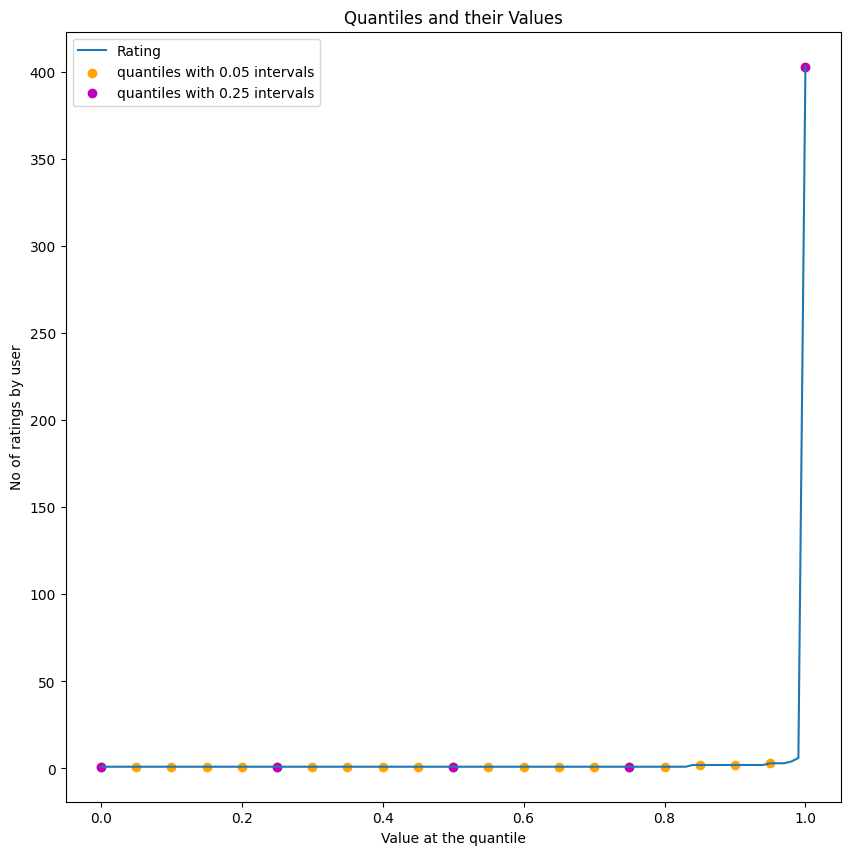

In [42]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [43]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 34



In [44]:
print('Collaberative filtering (Item-Item recommedation)')

Collaberative filtering (Item-Item recommedation)


In [47]:
print('Collaborative filtering is commonly used for recommender systems These techniques aim to fill in the missing entries of a user-item association matrix.')

Collaborative filtering is commonly used for recommender systems These techniques aim to fill in the missing entries of a user-item association matrix.


In [63]:
pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 17.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3095458 sha256=8def7b56d3143d1472d87185adc38038ec5222bd17a8c8875bf1244a3bc7094d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built scikit-surprise


In [64]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [65]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
new_df=electronics_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)
data = Dataset.load_from_df(new_df,reader)

In [66]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [67]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [68]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [69]:
test_pred

[Prediction(uid='A2YDDJ2XZ1DN53', iid='B00093IIRA', r_ui=5.0, est=4.058850210315736, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A8QJ18E4H4AR5', iid='B0000UI304', r_ui=1.0, est=4.058850210315736, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A3GRZ15FZ1KXQV', iid='B000095SB4', r_ui=5.0, est=4.058850210315736, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='AJZ301TBTSV3M', iid='B000BKJZ9Q', r_ui=4.0, est=4.058850210315736, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2HYUBXF4G4S4Q', iid='B00004YKHT', r_ui=1.0, est=4.242424242424242, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid='A1QLVRKEWEQLWV', iid='B00065AO0K', r_ui=4.0, est=4.058850210315736, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}),
 Prediction(uid='A2D817USALSGF7', iid='B000EPLP3C', r_ui